In [1]:
from typing import TypedDict, List, Annotated
import operator
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import Image, display

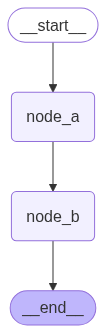

In [2]:
class State(TypedDict):
    value: Annotated[List[str], operator.add]

def node_a(state: State):
    return {"value": ["a"]}

def node_b(state: State):
    return {"value": ["b"]}

workflow = StateGraph(State)

workflow.add_node(node_a)
workflow.add_node(node_b)

workflow.add_edge(START, "node_a")
workflow.add_edge("node_a", "node_b")
workflow.add_edge("node_b", END)

graph = workflow.compile()

display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [3]:
graph.invoke({"value":[]})

{'value': ['a', 'b']}

**Checkpoints**

In [4]:
checkpointer = MemorySaver()
graph = workflow.compile(checkpointer=checkpointer)

In [5]:
config = {"configurable": {"thread_id": "1"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b']}

In [6]:
config = {"configurable": {"thread_id": "1"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b', 'a', 'b']}

In [7]:
config = {"configurable": {"thread_id": "2"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b']}

In [8]:
config = {"configurable": {"thread_id": "3"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b']}

In [9]:
list(graph.get_state_history({"configurable": {"thread_id": "1"}}))

[StateSnapshot(values={'value': ['a', 'b', 'a', 'b']}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f076854-a87a-6bbb-8006-703602597ee5'}}, metadata={'source': 'loop', 'step': 6, 'parents': {}}, created_at='2025-08-11T07:32:10.161854+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f076854-a878-66c9-8005-dc0fb4576542'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'value': ['a', 'b', 'a']}, next=('node_b',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f076854-a878-66c9-8005-dc0fb4576542'}}, metadata={'source': 'loop', 'step': 5, 'parents': {}}, created_at='2025-08-11T07:32:10.160909+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f076854-a874-6aa6-8004-69d11fc2a3c4'}}, tasks=(PregelTask(id='ef81c38e-f3ed-115d-1135-d50700188aba', name='node_b', path=('__pregel_pull', 'node_b'), error=None, interrupts

In [10]:
list(graph.get_state_history({"configurable": {"thread_id": "2"}}))

[StateSnapshot(values={'value': ['a', 'b']}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f076856-0b53-6d43-8002-449d973bc7e1'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-08-11T07:32:47.370366+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f076856-0b50-6f6c-8001-bd0fd0ec0455'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'value': ['a']}, next=('node_b',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f076856-0b50-6f6c-8001-bd0fd0ec0455'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-08-11T07:32:47.369193+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f076856-0b4d-63f6-8000-2ad4be15cca0'}}, tasks=(PregelTask(id='29857543-b7d4-b161-5b39-30218efc49c3', name='node_b', path=('__pregel_pull', 'node_b'), error=None, interrupts=(), state=None, res